<a href="https://colab.research.google.com/github/kumardurge/608-project/blob/main/Final608.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [ ]:
#uploading file
from google.colab import files
uploaded = files.upload()

Saving airlines.csv to airlines (3).csv


In [ ]:
#reading in file
data = pd.read_csv('airlines.csv')
data.head()

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,...,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,1623,3,7875,9639,20319,28189,24400,99,77167,4160
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,1245,15,6998,8287,13635,26810,17556,278,64480,6201
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,1562,14,7021,8670,14763,23379,23804,127,65865,3792
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,1100,18,5321,6513,13775,13712,20999,120,52747,4141


In [ ]:
#list of column names
list(data.columns)


['Airport.Code',
 'Airport.Name',
 'Time.Label',
 'Time.Month',
 'Time.Month Name',
 'Time.Year',
 'Statistics.# of Delays.Carrier',
 'Statistics.# of Delays.Late Aircraft',
 'Statistics.# of Delays.National Aviation System',
 'Statistics.# of Delays.Security',
 'Statistics.# of Delays.Weather',
 'Statistics.Carriers.Names',
 'Statistics.Carriers.Total',
 'Statistics.Flights.Cancelled',
 'Statistics.Flights.Delayed',
 'Statistics.Flights.Diverted',
 'Statistics.Flights.On Time',
 'Statistics.Flights.Total',
 'Statistics.Minutes Delayed.Carrier',
 'Statistics.Minutes Delayed.Late Aircraft',
 'Statistics.Minutes Delayed.National Aviation System',
 'Statistics.Minutes Delayed.Security',
 'Statistics.Minutes Delayed.Total',
 'Statistics.Minutes Delayed.Weather']

In [ ]:
#tidying data for Descriptive Analysis
delay_cols = [
    'Statistics.# of Delays.Carrier',
    'Statistics.# of Delays.Late Aircraft',
    'Statistics.# of Delays.National Aviation System',
    'Statistics.# of Delays.Security',
    'Statistics.# of Delays.Weather'
]
#filling na's with 0
df_clean = data[delay_cols].fillna(0)


#renaming variables to easier readibility
df_clean = df_clean.rename(columns={
    'Statistics.# of Delays.Carrier': 'Carrier',
    'Statistics.# of Delays.Late Aircraft': 'Late Aircraft',
    'Statistics.# of Delays.National Aviation System': 'NAS',
    'Statistics.# of Delays.Security': 'Security',
    'Statistics.# of Delays.Weather': 'Weather'
})

#total delays
totals = df_clean.sum().sort_values(ascending=False)
totals

summary = pd.DataFrame({
    "Delay Reason": totals.index,
    "Total Delays": totals.values
})

summary






,Delay Reason,Total Delays
0,NAS,4207790
1,Late Aircraft,3478260
2,Carrier,2532980
3,Weather,344780
4,Security,24577


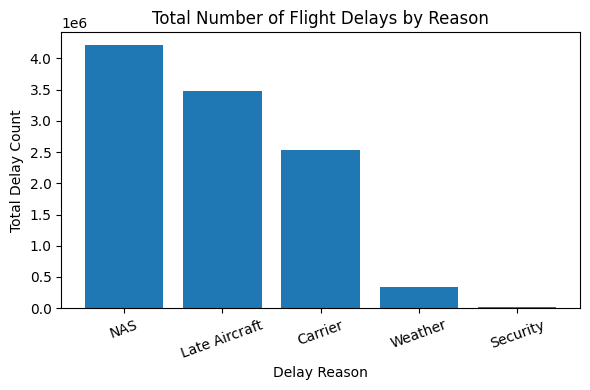

In [ ]:
#Descriptive Visualization (Total number of flights by reason)
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(summary["Delay Reason"], summary["Total Delays"])
plt.title("Total Number of Flight Delays by Reason")
plt.xlabel("Delay Reason")
plt.ylabel("Total Delay Count")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


In [ ]:
#EXPLANATORY TIDY

#You need to split this into separate rows, one airline per row.
data['Airline_List'] = data['Statistics.Carriers.Names'].str.split(',')

tidy = data.explode('Airline_List')
tidy['Airline_List'] = tidy['Airline_List'].str.strip()


delay_cols2 = [
    'Statistics.# of Delays.Carrier',
    'Statistics.# of Delays.Late Aircraft',
    'Statistics.# of Delays.National Aviation System',
    'Statistics.# of Delays.Security',
    'Statistics.# of Delays.Weather'
]

tidy = tidy[['Airline_List'] + delay_cols2]

#EXPLANATORY TIDY

#You need to split this into separate rows, one airline per row.
data['Airline_List'] = data['Statistics.Carriers.Names'].str.split(',')

tidy = data.explode('Airline_List')
tidy['Airline_List'] = tidy['Airline_List'].str.strip()


delay_cols2 = [
    'Statistics.# of Delays.Carrier',
    'Statistics.# of Delays.Late Aircraft',
    'Statistics.# of Delays.National Aviation System',
    'Statistics.# of Delays.Security',
    'Statistics.# of Delays.Weather'
]

tidy = tidy[['Airline_List'] + delay_cols2]

tidy = tidy.fillna(0)

airline_delays = tidy.groupby('Airline_List')[delay_cols].sum()

airline_delays = airline_delays.rename(columns={
    'Statistics.# of Delays.Carrier': 'Carrier',
    'Statistics.# of Delays.Late Aircraft': 'Late Aircraft',
    'Statistics.# of Delays.National Aviation System': 'NAS',
    'Statistics.# of Delays.Security': 'Security',
    'Statistics.# of Delays.Weather': 'Weather'
})
airline_delays







,Carrier,Late Aircraft,NAS,Security,Weather
Airline_List,,,,,
ATA Airlines d/b/a ATA,353670,443956,625347,5024,56150
AirTran Airways Corporation,1628647,2197326,2699089,15354,231196
Alaska Airlines Inc.,1664916,2360629,2654291,15187,201112
Aloha Airlines Inc.,32706,48099,33450,503,2663
America West Airlines Inc.,462901,569466,934671,6421,76662
American Airlines Inc.,2496748,3411583,4169810,23948,338371
American Eagle Airlines Inc.,1462114,2072671,2787420,13190,223570
Atlantic Coast Airlines,75761,112298,252636,932,17014
Atlantic Southeast Airlines,935796,1253760,1760400,9979,149440


<Figure size 600x400 with 0 Axes>

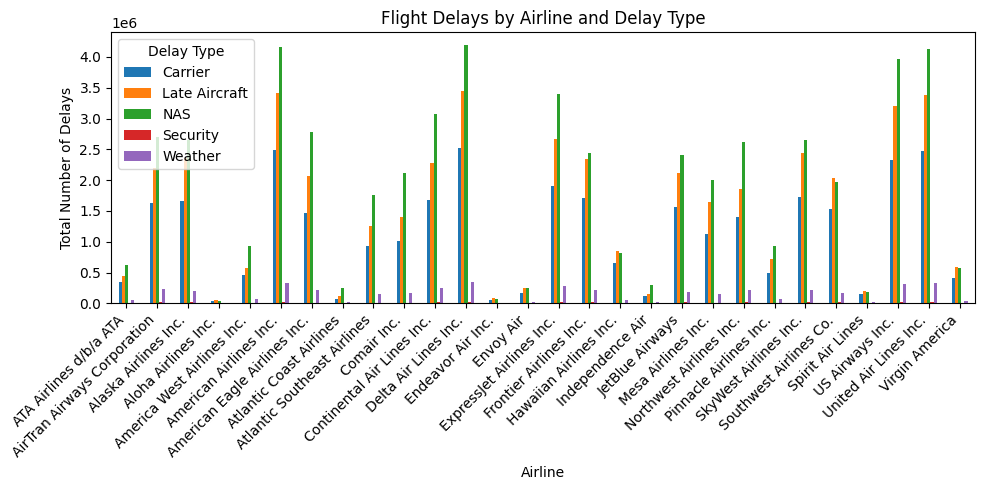

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
airline_delays.plot(kind='bar', figsize=(10,5))

plt.title("Flight Delays by Airline and Delay Type")
plt.xlabel("Airline")
plt.ylabel("Total Number of Delays")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Delay Type")
plt.tight_layout()
plt.show()


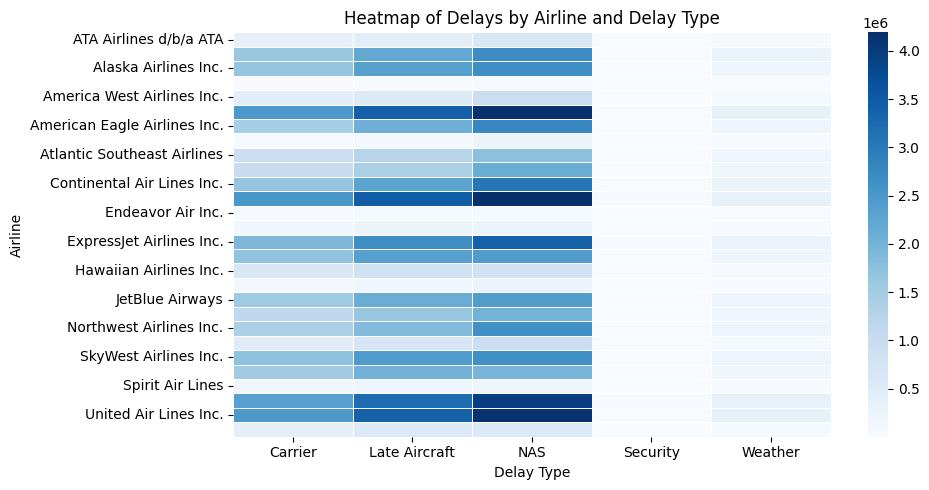

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,5))

sns.heatmap(airline_delays, cmap="Blues", linewidths=.5)

plt.title("Heatmap of Delays by Airline and Delay Type")
plt.xlabel("Delay Type")
plt.ylabel("Airline")
plt.tight_layout()
plt.show()


In [ ]:
#PREDICTIVE

data['Airline_List'] = data['Statistics.Carriers.Names'].str.split(',')
data = data.explode('Airline_List')
data['Airline_List'] = data['Airline_List'].str.strip()

data['Total_Delay_Minutes'] = (
    data['Statistics.Minutes Delayed.Carrier'] +
    data['Statistics.Minutes Delayed.Late Aircraft'] +
    data['Statistics.Minutes Delayed.National Aviation System'] +
    data['Statistics.Minutes Delayed.Security'] +
    data['Statistics.Minutes Delayed.Weather']
)

tidy_predict = data[[
    'Airline_List',
    'Time.Month',
    'Statistics.Minutes Delayed.Carrier',
    'Statistics.Minutes Delayed.Late Aircraft',
    'Statistics.Minutes Delayed.National Aviation System',
    'Statistics.Minutes Delayed.Security',
    'Statistics.Minutes Delayed.Weather',
    'Total_Delay_Minutes'
]]

tidy_predict = tidy_predict.rename(columns={
    'Airline_List': 'Airline',
    'Time.Month': 'Month',
    'Statistics.Minutes Delayed.Carrier': 'Carrier_Time',
    'Statistics.Minutes Delayed.Late Aircraft': 'LateAircraft_Time',
    'Statistics.Minutes Delayed.National Aviation System': 'NAS_Time',
    'Statistics.Minutes Delayed.Security': 'Security_Time',
    'Statistics.Minutes Delayed.Weather': 'Weather_Time',
})

tidy_predict = tidy_predict.fillna(0)

tidy_predict



,Airline,Month,Carrier_Time,LateAircraft_Time,NAS_Time,Security_Time,Weather_Time,Total_Delay_Minutes
0,American Airlines Inc.,6,61606,68335,118831,518,19474,268764
0,JetBlue Airways,6,61606,68335,118831,518,19474,268764
0,Continental Air Lines Inc.,6,61606,68335,118831,518,19474,268764
0,Delta Air Lines Inc.,6,61606,68335,118831,518,19474,268764
0,Atlantic Southeast Airlines,6,61606,68335,118831,518,19474,268764
...,...,...,...,...,...,...,...,...
4407,Delta Air Lines Inc.,1,22557,21164,11423,37,2593,57774
4407,Frontier Airlines Inc.,1,22557,21164,11423,37,2593,57774
4407,Spirit Air Lines,1,22557,21164,11423,37,2593,57774
4407,United Air Lines Inc.,1,22557,21164,11423,37,2593,57774


In [ ]:
list(tidy_predict.columns)

['Airline',
 'Month',
 'Carrier_Time',
 'LateAircraft_Time',
 'NAS_Time',
 'Security_Time',
 'Weather_Time',
 'Total_Delay_Minutes']

In [ ]:

# PREDICTIVE


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np


# Define predictors and target

X = tidy_predict[['Airline', 'Month',
                  'Carrier_Time', 'LateAircraft_Time',
                  'NAS_Time', 'Security_Time', 'Weather_Time']]

y = tidy_predict['Total_Delay_Minutes']


# 2. Split into train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=2025
)

#passing as numeric
categorical_features = ['Airline']
numeric_features = ['Month', 'Carrier_Time', 'LateAircraft_Time',
                    'NAS_Time', 'Security_Time', 'Weather_Time']

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

# Building Regression Pipeline
model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('regressor', LinearRegression())
])

# Fitting the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 0.0023602023275486436


In [ ]:
list(tidy_predict.columns)


['Airline',
 'Month',
 'Carrier_Time',
 'LateAircraft_Time',
 'NAS_Time',
 'Security_Time',
 'Weather_Time',
 'Total_Delay_Minutes']

In [ ]:
#Inferential

#Statistics.Carriers.Names
data['Airline_List'] = data['Statistics.Carriers.Names'].str.split(',')
data = data.explode('Airline_List')
data['Airline_List'] = data['Airline_List'].str.strip()

#Statistics.Flights.Cancelled
tidy_cancel = data[['Airline_List', 'Statistics.Flights.Cancelled']]
tidy_cancel = tidy_cancel.rename(columns={
    'Airline_List': 'Airline',
    'Statistics.Flights.Cancelled': 'Cancelled'
})

tidy_cancel = tidy_cancel.fillna(0)

cancel_by_airline = tidy_cancel.groupby('Airline')['Cancelled'].sum().reset_index()
cancel_by_airline = cancel_by_airline.sort_values(by='Cancelled', ascending=False)
cancel_by_airline






,Airline,Cancelled
11,Delta Air Lines Inc.,11970161
5,American Airlines Inc.,11936420
26,United Air Lines Inc.,11884135
25,US Airways Inc.,11472375
14,ExpressJet Airlines Inc.,10334280
10,Continental Air Lines Inc.,8839352
6,American Eagle Airlines Inc.,8726804
2,Alaska Airlines Inc.,7988476
22,SkyWest Airlines Inc.,7946543
1,AirTran Airways Corporation,7620039


In [ ]:
import numpy as np

# Number of bootstrap samples
n_boot = 10000

# bootstrap means
boot_means = []

# cancellation values
cancel_vals = cancel_by_airline['Cancelled'].values

# Bootstrap resampling
for i in range(n_boot):
    sample = np.random.choice(cancel_vals, size=len(cancel_vals), replace=True)
    boot_means.append(sample.mean())

boot_means = np.array(boot_means)


In [ ]:
lower = np.percentile(boot_means, 2.5)
upper = np.percentile(boot_means, 97.5)
point_estimate = cancel_by_airline['Cancelled'].mean()

print("lower bound",lower)
print("upper bound",upper)
print("point estimate", point_estimate)




lower bound 4105641.1205357146
upper bound 7080059.579464286
point estimate 5610829.464285715
